 # Закгузка необходимых библиотек

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Метод к ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# Метод опорных векторов
from sklearn.svm import SVC
# Дерево принятия решения
from sklearn.tree import DecisionTreeClassifier
import sklearn.externals
# набор инструментов для облегчения конвейерной обработки
import joblib


# Слои - это основные строительные блоки нейронных сетей.
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, LSTM, Bidirectional
from tensorflow import keras

from wfdb.io import get_record_list
from wfdb import rdsamp
from scipy.signal import resample_poly

print('библиотеки загружены')

библиотеки загружены


# Формирование массивов

In [178]:
# Training dataset.

df = pd.read_csv("train_v2.csv", header=None)
x_train = df.values[:, -3:]
print(x_train[100:115,-3:])
y_train = df.values[:, -3].astype(int)
print(y_train.shape)
print(y_train) 
y_s_train = df.values[:, -2:].astype(int)# Отсчеты
#print('y_s_train',y_s_train.shape)
#print('y_s_train',y_s_train)
#y_a_train = []
# beats[idx] = np.append(beats[idx], beats[idx+1][:40])
#for i,y_s_train in enumerate(y_s_train):
#    y_a_train = np.append(y_a_train,x_train[i,y_s_train])
    
#print(y_a_train.shape)
# Validation dataset.
df = pd.read_csv("validate_v2.csv", header=None)
x_validate = df.values[:, :-3]
y_validate = df.values[:, -3].astype(int)
y_s_validate = df.values[:, -2:].astype(int)
#y_a_validate = []
#for i,y_s_validate in enumerate(y_s_validate):
#    y_a_validate = np.append(y_a_validate,x_validate[i,y_s_validate])

#print(y_a_validate)
# Test dataset.
df = pd.read_csv("test_v2.csv", header=None)
x_test = df.values[:, :-3]
y_test = df.values[:, -3].astype(int)
y_s_test = df.values[:, -2:].astype(int)
#y_a_test = np.empty(shape=[0, 1])
#for i,y_s_test in enumerate(y_s_test):
#    y_a_test[i] = np.append(y_a_test,x_test[i,y_s_test])
    
print('test')
print('x',x_test.shape)
print('y',max(y_train))
print('y',max(y_validate))
print('y',max(y_test))

#print('s',y_s_test.shape)
#print(y_a_test.shape)

[[  0. 128. 128.]
 [  0.  99.   0.]
 [  0. 107.   0.]
 [  0. 113.   0.]
 [  1.  88.   0.]
 [  0.  23.  24.]
 [  0.  83.   0.]
 [  0.  91.   0.]
 [  1.  97.   0.]
 [  0. 102.   0.]
 [  1. 106.   0.]
 [  0. 108.   0.]
 [  0.  82.   0.]
 [  0.  92.   0.]
 [  0. 151.   0.]]
(92926,)
[0 0 0 ... 0 0 1]
test
x (30975, 187)
y 1
y 1
y 1


In [181]:
# Training dataset.

df = pd.read_csv("train_v3.csv", header=None)
print(df.shape)
x_train = df.values[:, :-3]
y_train = df.values[:, -3].astype(int)

#print('x',x_train[0:10,:])


# Validation dataset.
df = pd.read_csv("validate_v3.csv", header=None)
x_validate = df.values[:, :-3]
y_validate = df.values[:, -3].astype(int)


# Test dataset.
df = pd.read_csv("test_v3.csv", header=None)
x_test = df.values[:, :-3]
y_test = df.values[:, -3].astype(int)


df = pd.read_csv("test_long_real.csv", header=None)
x_test_long_real = df.values[:, :int(df.shape[1]/2)]
y_test_long_real = df.values[:, int(df.shape[1]/2):].astype(int)

 
print('test')
print('x',x_test.shape)
print('y',y_test.shape)

(84149, 190)
x [[0.671713 0.861508 0.334572 ... 0.       0.       0.      ]
 [0.701251 0.903993 0.457934 ... 0.       0.       0.      ]
 [0.757441 0.951138 0.689313 ... 0.       0.       0.      ]
 ...
 [0.685503 0.845739 0.270717 ... 0.       0.       0.      ]
 [0.910112 0.731068 0.623124 ... 0.       0.       0.      ]
 [0.687443 0.901049 0.314165 ... 0.       0.       0.      ]]
y 1
test
x (28050, 187)
y (28050,)
s (30975, 2)


In [182]:
del df

In [105]:
length = x_test.shape[1]
x_test_long_short= np.empty(shape = [4,int(x_test_long.shape[1]/length),187])

#print(x_test_long[:,length:length])
for j in range(0,4):
    for i in range(0,int(x_test_long.shape[1]/length)):
        x_test_long_short[j,i,:] = x_test_long[j,length*i:(i+1)*length]
        
        

1206


In [102]:
print(x_test_long_short)

[[[0.488398 0.48556  0.487315 ... 0.432694 0.434364 0.431701]
  [0.431303 0.435715 0.43356  ... 0.430004 0.431572 0.432968]
  [0.438961 0.4516   0.469791 ... 0.460929 0.462519 0.460988]
  ...
  [0.369568 0.367956 0.369127 ... 0.537582 0.539478 0.541642]
  [0.545784 0.550139 0.550798 ... 0.389036 0.39984  0.408295]
  [0.418108 0.42946  0.436803 ... 0.447975 0.451859 0.451319]]

 [[0.527945 0.525594 0.525437 ... 0.525039 0.525591 0.526818]
  [0.535295 0.537386 0.539469 ... 0.554129 0.546501 0.542903]
  [0.544985 0.544696 0.544207 ... 0.53577  0.536053 0.535785]
  ...
  [0.612254 0.613435 0.61091  ... 0.542525 0.537912 0.536958]
  [0.542429 0.546049 0.545302 ... 0.628827 0.617085 0.608214]
  [0.59947  0.588536 0.574481 ... 0.539072 0.541299 0.538577]]

 [[0.46532  0.461792 0.464143 ... 0.483194 0.48058  0.482746]
  [0.483779 0.487554 0.487761 ... 0.451456 0.450464 0.487429]
  [0.57781  0.718062 0.778741 ... 0.440096 0.442949 0.437929]
  ...
  [0.425196 0.428031 0.428576 ... 0.436817 0.433

In [152]:

length = np.shape(x_test)[1]
print(type(length))
print('shape',int(np.shape(y_test_long)[1]/length))
y_test_long_short= np.empty(shape = [4,int(np.shape(y_test_long)[1]/length),6])

for j in range(0,4):
    for i in range(0,int(y_test_long.shape[1]/length)):
        maxim = max(y_test_long[j,length*i:(i+1)*length])
        place_1 = np.where(y_test_long[j,length*i:(i+1)*length] == 1)
        place_2 = np.where(y_test_long[j,length*i:(i+1)*length] == 2)
        print(i)
        print('1',place_1)
        print('2',place_2)
        y_test_long_short[j,i,:2] = place_1[0]
        y_test_long_short[j,i,3:] = place_2[0]

print(y_test_long_short[1,0:100])

<class 'int'>
shape 1206
0
1 (array([111], dtype=int64),)
2 (array([ 15, 177], dtype=int64),)


ValueError: could not broadcast input array from shape (2) into shape (3)

In [43]:
del df

## метод ближайших соседей

In [18]:
%%time
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

#print(y_predicted.shape)
#print(y_test)

Wall time: 8.65 s


KNeighborsClassifier()

#### прогноз

In [153]:
%%time
y_predicted = (knn_model.predict(x_test) >= 0.15)

NameError: name 'knn_model' is not defined

#### расчет параметров эффективности

In [20]:
conf_mat = confusion_matrix(y_test, y_predicted)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100
print(" K Nearest Neighbor Model ")
print('Specificity : ', specificity)
print('Sensitivity : ', sensitivity)
print("Accuracy    : ", knn_model.score(x_test, y_test)*100)

 K Nearest Neighbor Model 
Specificity :  96.07843137254902
Sensitivity :  97.48106177249491
Accuracy    :  97.14580306509819


#### сохранение модели

In [25]:
KNN = 'knn_model.pkl'
joblib.dump(knn_model, KNN)
#knn_model.save("KNN_Classification_model.h5")

['knn_model.pkl']

#### использование сохраненной модели

In [156]:
saved_model = joblib.load('knn_model.pkl')
result = saved_model.score(x_test, y_test)
print(result)

0.7453334283271588


In [160]:
y_predicted = (saved_model.predict(x_test_long[0].T) >= 0.15)

ValueError: Expected 2D array, got 1D array instead:
array=[0.488398 0.48556  0.487315 ... 0.424437 0.420312 0.426428].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

##### кросс-валидация 5


In [ ]:
cross_val_score(KNN, X_digits, y_digits, cv=5, n_jobs=-1)


## метод опорных векторов

In [29]:
%%time
svm_model = SVC(gamma='auto')
svm_model.fit(x_train, y_train)

Wall time: 21min 5s


SVC(gamma='auto')

In [30]:
%%time
y_predicted = (svm_model.predict(x_test) >= 0.15)

Wall time: 5min 26s


In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
conf_mat = confusion_matrix(y_test, y_predicted)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100

print(" Support Vector Machine Model ")
print('Specificity : ', specificity)
print('Sensitivity : ', sensitivity)
print("Accuracy    : ", svm_model.score(x_test, y_test)*100)

 Support Vector Machine Model 
Specificity :  82.37818732643272
Sensitivity :  88.22513812154696
Accuracy    :  87.13971036228149


In [32]:
SVM = 'svm_model.pkl'
joblib.dump(svm_model, SVM)

['svm_model.pkl']

In [161]:
saved_model = joblib.load('svm_model.pkl')
result = saved_model.score(x_test, y_test)
print(result)

0.8063907096038757


## дерево принятия решения

In [34]:
%%time
tree_model = DecisionTreeClassifier()
#y_a_train = y_a_train.reshape(1, -1)
#y_test = y_test.reshape(-1, 1)
tree_model.fit(x_train, y_train)


Wall time: 34 s


DecisionTreeClassifier()

In [35]:
%%time
y_predicted = (tree_model.predict(x_test) >= 0.15)

Wall time: 18.5 ms


In [36]:
conf_mat = confusion_matrix(y_test, y_predicted)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100

print(" Decision Tree Model ")
print('Specificity : ', specificity)
print('Sensitivity : ', sensitivity)
print("Accuracy    : ", tree_model.score(x_test, y_test)*100)

 Decision Tree Model 
Specificity :  90.04956157072056
Sensitivity :  96.36442731961967
Accuracy    :  94.81182921685335


In [37]:
TREE = 'tree_model.pkl'
joblib.dump(tree_model, TREE)

['tree_model.pkl']

In [38]:
saved_model = joblib.load('tree_model.pkl')
result = saved_model.score(x_test, y_test)
print(result)

0.9481182921685335


## искусственная нейронная сеть

### обучение

In [51]:
feature_columns = [tf.feature_column.numeric_column('beat', shape=[187])]

estimator = tf.estimator.DNNClassifier(
   hidden_units=[256, 64, 16],
   feature_columns=feature_columns,
   model_dir='ecg_model_DNN_d',
   n_classes=2,
   optimizer=tf.keras.optimizers.Adam(lr=1e-4),
   dropout=0.1
   
)


input_fn_train = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'beat': x_train},
    y=y_train,
    batch_size=256,
    shuffle=True,
    num_epochs=None
)

metric = [tf.keras.metrics.TruePositives(name='tp'),tf.keras.metrics.TrueNegatives(name='tn'), 
          tf.keras.metrics.FalsePositives(name='fp'),tf.keras.metrics.FalseNegatives(name='fn')]

def tn(labels, predictions):
    auc_metric = tf.keras.metrics.TrueNegatives(name='tn')
    auc_metric.update_state(y_true=labels, y_pred=predictions['logistic'])
    return {'tn': auc_metric}



def fp(labels, predictions):
    auc_metric = tf.keras.metrics.FalsePositives(name='fp')
    auc_metric.update_state(y_true=labels, y_pred=predictions['logistic'])
    return {'fp': auc_metric}

estimator = tf.estimator.add_metrics(estimator, tn)
estimator = tf.estimator.add_metrics(estimator, fp)   



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'ecg_model_DNN_d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using config: {'_model_dir': 'ecg_model_DNN_d', '_tf_random_seed':

In [52]:
%%time
hist = estimator.train(input_fn=input_fn_train, steps=400000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into ecg_model_DNN_d\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.7049111, step = 0
INFO:tensorflow:global_step/sec: 557.124
INFO:tensorflow:loss = 0.55861366, step = 100 (0.180 sec)
INFO:tensorflow:global_step/sec: 604.115
INFO:tensorflow:loss = 0.46698415, step = 200 (0.167 sec)
INFO:tensorflow:global_step/sec: 566.567
INFO:tensorflow:loss = 0.4198462, step = 300 (0.176 sec)
INFO:tensorflow:global_step/sec: 696.412
INFO:tensorflo

INFO:tensorflow:global_step/sec: 638.753
INFO:tensorflow:loss = 0.08719236, step = 7700 (0.155 sec)
INFO:tensorflow:global_step/sec: 726.692
INFO:tensorflow:loss = 0.13341162, step = 7800 (0.137 sec)
INFO:tensorflow:global_step/sec: 759.717
INFO:tensorflow:loss = 0.16438639, step = 7900 (0.132 sec)
INFO:tensorflow:global_step/sec: 771.4
INFO:tensorflow:loss = 0.09787992, step = 8000 (0.131 sec)
INFO:tensorflow:global_step/sec: 737.38
INFO:tensorflow:loss = 0.1024248, step = 8100 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.372
INFO:tensorflow:loss = 0.10274939, step = 8200 (0.135 sec)
INFO:tensorflow:global_step/sec: 686.868
INFO:tensorflow:loss = 0.109191686, step = 8300 (0.146 sec)
INFO:tensorflow:global_step/sec: 731.993
INFO:tensorflow:loss = 0.14602439, step = 8400 (0.137 sec)
INFO:tensorflow:global_step/sec: 696.408
INFO:tensorflow:loss = 0.10306456, step = 8500 (0.145 sec)
INFO:tensorflow:global_step/sec: 726.687
INFO:tensorflow:loss = 0.06655621, step = 8600 (0.137 sec)
INF

INFO:tensorflow:loss = 0.080842584, step = 15800 (0.134 sec)
INFO:tensorflow:global_step/sec: 731.993
INFO:tensorflow:loss = 0.056208443, step = 15900 (0.136 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.09160242, step = 16000 (0.132 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.054702967, step = 16100 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.715
INFO:tensorflow:loss = 0.060084548, step = 16200 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.719
INFO:tensorflow:loss = 0.063800365, step = 16300 (0.133 sec)
INFO:tensorflow:global_step/sec: 754.009
INFO:tensorflow:loss = 0.06672029, step = 16400 (0.132 sec)
INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.07222025, step = 16500 (0.137 sec)
INFO:tensorflow:global_step/sec: 754.009
INFO:tensorflow:loss = 0.101351775, step = 16600 (0.134 sec)
INFO:tensorflow:global_step/sec: 754.004
INFO:tensorflow:loss = 0.07203254, step = 16700 (0.133 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.032864563, step = 23900 (0.133 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.061953157, step = 24000 (0.136 sec)
INFO:tensorflow:global_step/sec: 754.006
INFO:tensorflow:loss = 0.03916481, step = 24100 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.042035546, step = 24200 (0.132 sec)
INFO:tensorflow:global_step/sec: 754.009
INFO:tensorflow:loss = 0.063287914, step = 24300 (0.133 sec)
INFO:tensorflow:global_step/sec: 742.833
INFO:tensorflow:loss = 0.0487746, step = 24400 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.008
INFO:tensorflow:loss = 0.057436053, step = 24500 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.717
INFO:tensorflow:loss = 0.09413039, step = 24600 (0.133 sec)
INFO:tensorflow:global_step/sec: 754.009
INFO:tensorflow:loss = 0.048909597, step = 24700 (0.132 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.10653811, step = 24800 (0.136 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.037094444, step = 32000 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.832
INFO:tensorflow:loss = 0.051665712, step = 32100 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.721
INFO:tensorflow:loss = 0.06533422, step = 32200 (0.132 sec)
INFO:tensorflow:global_step/sec: 765.519
INFO:tensorflow:loss = 0.040332183, step = 32300 (0.132 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.036159, step = 32400 (0.133 sec)
INFO:tensorflow:global_step/sec: 765.515
INFO:tensorflow:loss = 0.045436177, step = 32500 (0.132 sec)
INFO:tensorflow:global_step/sec: 765.519
INFO:tensorflow:loss = 0.032318246, step = 32600 (0.131 sec)
INFO:tensorflow:global_step/sec: 765.517
INFO:tensorflow:loss = 0.055853304, step = 32700 (0.131 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.032843314, step = 32800 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.717
INFO:tensorflow:loss = 0.036307245, step = 32900 (0.131 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.06543793, step = 40100 (0.131 sec)
INFO:tensorflow:global_step/sec: 759.719
INFO:tensorflow:loss = 0.052832164, step = 40200 (0.132 sec)
INFO:tensorflow:global_step/sec: 765.517
INFO:tensorflow:loss = 0.021666976, step = 40300 (0.131 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.04295808, step = 40400 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.06702562, step = 40500 (0.132 sec)
INFO:tensorflow:global_step/sec: 765.515
INFO:tensorflow:loss = 0.027426355, step = 40600 (0.132 sec)
INFO:tensorflow:global_step/sec: 765.519
INFO:tensorflow:loss = 0.030650176, step = 40700 (0.131 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.04276573, step = 40800 (0.134 sec)
INFO:tensorflow:global_step/sec: 765.518
INFO:tensorflow:loss = 0.024834191, step = 40900 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.04960703, step = 41000 (0.132 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.021174675, step = 48200 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.717
INFO:tensorflow:loss = 0.06506097, step = 48300 (0.132 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.049976513, step = 48400 (0.136 sec)
INFO:tensorflow:global_step/sec: 759.719
INFO:tensorflow:loss = 0.053132586, step = 48500 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.050330754, step = 48600 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.722
INFO:tensorflow:loss = 0.02619654, step = 48700 (0.131 sec)
INFO:tensorflow:global_step/sec: 742.833
INFO:tensorflow:loss = 0.025876973, step = 48800 (0.136 sec)
INFO:tensorflow:global_step/sec: 754.008
INFO:tensorflow:loss = 0.009068846, step = 48900 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.715
INFO:tensorflow:loss = 0.029256687, step = 49000 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.719
INFO:tensorflow:loss = 0.07633446, step = 49100 (0.131 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.011291055, step = 56300 (0.132 sec)
INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.042760774, step = 56400 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.717
INFO:tensorflow:loss = 0.050440066, step = 56500 (0.132 sec)
INFO:tensorflow:global_step/sec: 754.009
INFO:tensorflow:loss = 0.016560856, step = 56600 (0.133 sec)
INFO:tensorflow:global_step/sec: 754.004
INFO:tensorflow:loss = 0.032882433, step = 56700 (0.133 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.053651758, step = 56800 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.02555338, step = 56900 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.718
INFO:tensorflow:loss = 0.041187417, step = 57000 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.721
INFO:tensorflow:loss = 0.016431017, step = 57100 (0.133 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.054422744, step = 57200 (0.135 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.03685205, step = 64400 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.009
INFO:tensorflow:loss = 0.025582768, step = 64500 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.715
INFO:tensorflow:loss = 0.029217971, step = 64600 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.721
INFO:tensorflow:loss = 0.0370875, step = 64700 (0.132 sec)
INFO:tensorflow:global_step/sec: 737.371
INFO:tensorflow:loss = 0.04424361, step = 64800 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.024505734, step = 64900 (0.136 sec)
INFO:tensorflow:global_step/sec: 754.006
INFO:tensorflow:loss = 0.014939174, step = 65000 (0.132 sec)
INFO:tensorflow:global_step/sec: 748.381
INFO:tensorflow:loss = 0.022562087, step = 65100 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.019528074, step = 65200 (0.136 sec)
INFO:tensorflow:global_step/sec: 765.514
INFO:tensorflow:loss = 0.0090603065, step = 6

INFO:tensorflow:global_step/sec: 765.517
INFO:tensorflow:loss = 0.015585536, step = 72500 (0.131 sec)
INFO:tensorflow:global_step/sec: 765.517
INFO:tensorflow:loss = 0.036672477, step = 72600 (0.131 sec)
INFO:tensorflow:global_step/sec: 754.006
INFO:tensorflow:loss = 0.013707296, step = 72700 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.721
INFO:tensorflow:loss = 0.03521159, step = 72800 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.717
INFO:tensorflow:loss = 0.059659608, step = 72900 (0.131 sec)
INFO:tensorflow:global_step/sec: 765.519
INFO:tensorflow:loss = 0.033533465, step = 73000 (0.131 sec)
INFO:tensorflow:global_step/sec: 754
INFO:tensorflow:loss = 0.014116564, step = 73100 (0.133 sec)
INFO:tensorflow:global_step/sec: 754.013
INFO:tensorflow:loss = 0.012588324, step = 73200 (0.133 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.018065602, step = 73300 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.371
INFO:tensorflow:loss = 0.02957, step = 73400 (

INFO:tensorflow:global_step/sec: 726.689
INFO:tensorflow:loss = 0.054830626, step = 80600 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.377
INFO:tensorflow:loss = 0.016148401, step = 80700 (0.134 sec)
INFO:tensorflow:global_step/sec: 748.377
INFO:tensorflow:loss = 0.016555324, step = 80800 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.008
INFO:tensorflow:loss = 0.019649683, step = 80900 (0.132 sec)
INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.015950019, step = 81000 (0.138 sec)
INFO:tensorflow:global_step/sec: 754.01
INFO:tensorflow:loss = 0.049881525, step = 81100 (0.133 sec)
INFO:tensorflow:global_step/sec: 754.005
INFO:tensorflow:loss = 0.017064448, step = 81200 (0.132 sec)
INFO:tensorflow:global_step/sec: 748.376
INFO:tensorflow:loss = 0.024168383, step = 81300 (0.134 sec)
INFO:tensorflow:global_step/sec: 731.994
INFO:tensorflow:loss = 0.021172777, step = 81400 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.01034767, step = 

INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.015490671, step = 88700 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.02250554, step = 88800 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.013619281, step = 88900 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.018392682, step = 89000 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.688
INFO:tensorflow:loss = 0.012720238, step = 89100 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.027224783, step = 89200 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.372
INFO:tensorflow:loss = 0.04721678, step = 89300 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.026768982, step = 89400 (0.138 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.027957711, step = 89500 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.020638919, step = 

INFO:tensorflow:global_step/sec: 700.987
INFO:tensorflow:loss = 0.02599885, step = 96800 (0.143 sec)
INFO:tensorflow:global_step/sec: 623.105
INFO:tensorflow:loss = 0.0045377384, step = 96900 (0.162 sec)
INFO:tensorflow:global_step/sec: 634.702
INFO:tensorflow:loss = 0.02516608, step = 97000 (0.157 sec)
INFO:tensorflow:global_step/sec: 706.215
INFO:tensorflow:loss = 0.009239223, step = 97100 (0.142 sec)
INFO:tensorflow:global_step/sec: 701.282
INFO:tensorflow:loss = 0.012404656, step = 97200 (0.142 sec)
INFO:tensorflow:global_step/sec: 519.599
INFO:tensorflow:loss = 0.027170097, step = 97300 (0.193 sec)
INFO:tensorflow:global_step/sec: 696.41
INFO:tensorflow:loss = 0.012145242, step = 97400 (0.143 sec)
INFO:tensorflow:global_step/sec: 701.278
INFO:tensorflow:loss = 0.030867875, step = 97500 (0.143 sec)
INFO:tensorflow:global_step/sec: 726.688
INFO:tensorflow:loss = 0.004262806, step = 97600 (0.138 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.005425062, step = 

INFO:tensorflow:loss = 0.06362134, step = 104800 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.014016726, step = 104900 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.044975553, step = 105000 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.685
INFO:tensorflow:loss = 0.029679492, step = 105100 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.0035913675, step = 105200 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.014632432, step = 105300 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.38
INFO:tensorflow:loss = 0.035901643, step = 105400 (0.135 sec)
INFO:tensorflow:global_step/sec: 706.216
INFO:tensorflow:loss = 0.006384897, step = 105500 (0.142 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.008654323, step = 105600 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.018167315, step = 105700 (0.136 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.005966849, step = 112800 (0.136 sec)
INFO:tensorflow:global_step/sec: 706.22
INFO:tensorflow:loss = 0.0066201626, step = 112900 (0.141 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.019970335, step = 113000 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.044764742, step = 113100 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.028633434, step = 113200 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.688
INFO:tensorflow:loss = 0.050478935, step = 113300 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.015021009, step = 113400 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.38
INFO:tensorflow:loss = 0.014507599, step = 113500 (0.134 sec)
INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.007494852, step = 113600 (0.138 sec)
INFO:tensorflow:global_step/sec: 721.46
INFO:tensorflow:loss = 0.023557786, step = 113700 (0.138 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.015386828, step = 120800 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.0187626, step = 120900 (0.137 sec)
INFO:tensorflow:global_step/sec: 716.306
INFO:tensorflow:loss = 0.018670369, step = 121000 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.372
INFO:tensorflow:loss = 0.0052051116, step = 121100 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.029912774, step = 121200 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.027768731, step = 121300 (0.135 sec)
INFO:tensorflow:global_step/sec: 731.994
INFO:tensorflow:loss = 0.027694881, step = 121400 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.833
INFO:tensorflow:loss = 0.01302184, step = 121500 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.034305114, step = 121600 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.00996599, step = 121700 (0.134 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.028683878, step = 128800 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.378
INFO:tensorflow:loss = 0.019413283, step = 128900 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.832
INFO:tensorflow:loss = 0.049823556, step = 129000 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.012291585, step = 129100 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.688
INFO:tensorflow:loss = 0.024117757, step = 129200 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.008693573, step = 129300 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.032155056, step = 129400 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.84
INFO:tensorflow:loss = 0.012805587, step = 129500 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.021556204, step = 129600 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.041820727, step = 129700 (0.134 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.032977846, step = 136800 (0.136 sec)
INFO:tensorflow:global_step/sec: 716.305
INFO:tensorflow:loss = 0.008139297, step = 136900 (0.140 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.056779157, step = 137000 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.01816027, step = 137100 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.012716803, step = 137200 (0.135 sec)
INFO:tensorflow:global_step/sec: 718.281
INFO:tensorflow:loss = 0.02743363, step = 137300 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.016283156, step = 137400 (0.135 sec)
INFO:tensorflow:global_step/sec: 731.99
INFO:tensorflow:loss = 0.022679748, step = 137500 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.377
INFO:tensorflow:loss = 0.008946129, step = 137600 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.46
INFO:tensorflow:loss = 0.0014737275,

INFO:tensorflow:global_step/sec: 731.989
INFO:tensorflow:loss = 0.0076260623, step = 144800 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.013215008, step = 144900 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.372
INFO:tensorflow:loss = 0.03637828, step = 145000 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.688
INFO:tensorflow:loss = 0.0095065, step = 145100 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.0019551571, step = 145200 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.38
INFO:tensorflow:loss = 0.02589186, step = 145300 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.0066569718, step = 145400 (0.134 sec)
INFO:tensorflow:global_step/sec: 716.308
INFO:tensorflow:loss = 0.011174938, step = 145500 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.0068396362, step = 145600 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.371
INFO:tensorflow:loss = 0.01913219

INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.0066260584, step = 152800 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.831
INFO:tensorflow:loss = 0.016336005, step = 152900 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.465
INFO:tensorflow:loss = 0.018969636, step = 153000 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.0034150481, step = 153100 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.833
INFO:tensorflow:loss = 0.009663661, step = 153200 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.372
INFO:tensorflow:loss = 0.0046960604, step = 153300 (0.137 sec)
INFO:tensorflow:global_step/sec: 706.22
INFO:tensorflow:loss = 0.0024292408, step = 153400 (0.141 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.016561218, step = 153500 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.0028736917, step = 153600 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.012

INFO:tensorflow:global_step/sec: 711.227
INFO:tensorflow:loss = 0.0034367554, step = 160800 (0.140 sec)
INFO:tensorflow:global_step/sec: 748.377
INFO:tensorflow:loss = 0.0054634507, step = 160900 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.0039253663, step = 161000 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.002207523, step = 161100 (0.135 sec)
INFO:tensorflow:global_step/sec: 716.309
INFO:tensorflow:loss = 0.031770907, step = 161200 (0.140 sec)
INFO:tensorflow:global_step/sec: 748.375
INFO:tensorflow:loss = 0.015168903, step = 161300 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.374
INFO:tensorflow:loss = 0.007176712, step = 161400 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.023145977, step = 161500 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.688
INFO:tensorflow:loss = 0.027453726, step = 161600 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.833
INFO:tensorflow:loss = 0.0067

INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.010530035, step = 168800 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.03192258, step = 168900 (0.134 sec)
INFO:tensorflow:global_step/sec: 716.309
INFO:tensorflow:loss = 0.022727631, step = 169000 (0.140 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.017164892, step = 169100 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.2
INFO:tensorflow:loss = 0.012080379, step = 169200 (0.137 sec)
INFO:tensorflow:global_step/sec: 732.05
INFO:tensorflow:loss = 0.042073276, step = 169300 (0.135 sec)
INFO:tensorflow:global_step/sec: 723.206
INFO:tensorflow:loss = 0.009695858, step = 169400 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.0045491657, step = 169500 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.025399143, step = 169600 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.009929082,

INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.020480722, step = 176800 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.369
INFO:tensorflow:loss = 0.01425929, step = 176900 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.693
INFO:tensorflow:loss = 0.032781355, step = 177000 (0.138 sec)
INFO:tensorflow:global_step/sec: 748.376
INFO:tensorflow:loss = 0.012971199, step = 177100 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.020560414, step = 177200 (0.136 sec)
INFO:tensorflow:global_step/sec: 721.458
INFO:tensorflow:loss = 0.015301178, step = 177300 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.376
INFO:tensorflow:loss = 0.018225372, step = 177400 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.0148545895, step = 177500 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.0026327656, step = 177600 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.46
INFO:tensorflow:loss = 0.0035080

INFO:tensorflow:global_step/sec: 551.001
INFO:tensorflow:loss = 0.02726065, step = 184800 (0.182 sec)
INFO:tensorflow:global_step/sec: 677.586
INFO:tensorflow:loss = 0.0069754682, step = 184900 (0.147 sec)
INFO:tensorflow:global_step/sec: 696.415
INFO:tensorflow:loss = 0.008035682, step = 185000 (0.144 sec)
INFO:tensorflow:global_step/sec: 706.214
INFO:tensorflow:loss = 0.0065913433, step = 185100 (0.142 sec)
INFO:tensorflow:global_step/sec: 711.228
INFO:tensorflow:loss = 0.0043830667, step = 185200 (0.141 sec)
INFO:tensorflow:global_step/sec: 711.224
INFO:tensorflow:loss = 0.0043064244, step = 185300 (0.142 sec)
INFO:tensorflow:global_step/sec: 691.608
INFO:tensorflow:loss = 0.0024389168, step = 185400 (0.145 sec)
INFO:tensorflow:global_step/sec: 533.405
INFO:tensorflow:loss = 0.014132802, step = 185500 (0.187 sec)
INFO:tensorflow:global_step/sec: 701.301
INFO:tensorflow:loss = 0.002712362, step = 185600 (0.143 sec)
INFO:tensorflow:global_step/sec: 677.588
INFO:tensorflow:loss = 0.025

INFO:tensorflow:global_step/sec: 731.993
INFO:tensorflow:loss = 0.010500901, step = 192800 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.992
INFO:tensorflow:loss = 0.013484012, step = 192900 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.379
INFO:tensorflow:loss = 0.015700318, step = 193000 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.836
INFO:tensorflow:loss = 0.016109757, step = 193100 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.99
INFO:tensorflow:loss = 0.005210935, step = 193200 (0.137 sec)
INFO:tensorflow:global_step/sec: 731.993
INFO:tensorflow:loss = 0.018859314, step = 193300 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.835
INFO:tensorflow:loss = 0.019855864, step = 193400 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.377
INFO:tensorflow:loss = 0.01714648, step = 193500 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.372
INFO:tensorflow:loss = 0.0008573184, step = 193600 (0.137 sec)
INFO:tensorflow:global_step/sec: 721.459
INFO:tensorflow:loss = 0.03102276

INFO:tensorflow:global_step/sec: 748.383
INFO:tensorflow:loss = 0.014059186, step = 200800 (0.134 sec)
INFO:tensorflow:global_step/sec: 754.002
INFO:tensorflow:loss = 0.0068980954, step = 200900 (0.134 sec)
INFO:tensorflow:global_step/sec: 726.689
INFO:tensorflow:loss = 0.009288947, step = 201000 (0.137 sec)
INFO:tensorflow:global_step/sec: 721.459
INFO:tensorflow:loss = 0.012710255, step = 201100 (0.140 sec)
INFO:tensorflow:global_step/sec: 742.837
INFO:tensorflow:loss = 0.034382947, step = 201200 (0.134 sec)
INFO:tensorflow:global_step/sec: 748.377
INFO:tensorflow:loss = 0.02110625, step = 201300 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.373
INFO:tensorflow:loss = 0.004587282, step = 201400 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.463
INFO:tensorflow:loss = 0.015995601, step = 201500 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.833
INFO:tensorflow:loss = 0.010882495, step = 201600 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.375
INFO:tensorflow:loss = 0.0024739

INFO:tensorflow:global_step/sec: 721.426
INFO:tensorflow:loss = 0.0066784956, step = 208800 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0071116737, step = 208900 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.008475426, step = 209000 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.682
INFO:tensorflow:loss = 0.025101176, step = 209100 (0.132 sec)
INFO:tensorflow:global_step/sec: 716.275
INFO:tensorflow:loss = 0.032061674, step = 209200 (0.140 sec)
INFO:tensorflow:global_step/sec: 731.963
INFO:tensorflow:loss = 0.0072122114, step = 209300 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.011442487, step = 209400 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.013982798, step = 209500 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.0062168324, step = 209600 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.001

INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.009385674, step = 216800 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.427
INFO:tensorflow:loss = 0.0058067534, step = 216900 (0.139 sec)
INFO:tensorflow:global_step/sec: 731.961
INFO:tensorflow:loss = 0.019367786, step = 217000 (0.136 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.014897475, step = 217100 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.0019739405, step = 217200 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.656
INFO:tensorflow:loss = 0.002443682, step = 217300 (0.138 sec)
INFO:tensorflow:global_step/sec: 731.961
INFO:tensorflow:loss = 0.0049753585, step = 217400 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.008106168, step = 217500 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.003288887, step = 217600 (0.136 sec)
INFO:tensorflow:global_step/sec: 721.428
INFO:tensorflow:loss = 0.0153

INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.003377792, step = 224800 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.004948269, step = 224900 (0.136 sec)
INFO:tensorflow:global_step/sec: 721.426
INFO:tensorflow:loss = 0.018563246, step = 225000 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.0021951832, step = 225100 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.343
INFO:tensorflow:loss = 0.001652614, step = 225200 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.0068043126, step = 225300 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.655
INFO:tensorflow:loss = 0.007419736, step = 225400 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.008679943, step = 225500 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.020780165, step = 225600 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.00278

INFO:tensorflow:global_step/sec: 731.962
INFO:tensorflow:loss = 0.0059965006, step = 232800 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.958
INFO:tensorflow:loss = 0.01798645, step = 232900 (0.137 sec)
INFO:tensorflow:global_step/sec: 716.273
INFO:tensorflow:loss = 0.00836106, step = 233000 (0.140 sec)
INFO:tensorflow:global_step/sec: 731.961
INFO:tensorflow:loss = 0.012803745, step = 233100 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.001919412, step = 233200 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.0071989945, step = 233300 (0.137 sec)
INFO:tensorflow:global_step/sec: 716.275
INFO:tensorflow:loss = 0.004936738, step = 233400 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.03146601, step = 233500 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.018623073, step = 233600 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.00344950

INFO:tensorflow:global_step/sec: 748.349
INFO:tensorflow:loss = 0.0031147837, step = 240800 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.017452072, step = 240900 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.005726814, step = 241000 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.426
INFO:tensorflow:loss = 0.0281291, step = 241100 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.658
INFO:tensorflow:loss = 0.0015470055, step = 241200 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.032089807, step = 241300 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.0057775313, step = 241400 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.659
INFO:tensorflow:loss = 0.0034434504, step = 241500 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.023776717, step = 241600 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.00237

INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.015387374, step = 248800 (0.137 sec)
INFO:tensorflow:global_step/sec: 721.387
INFO:tensorflow:loss = 0.0120042255, step = 248900 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.849
INFO:tensorflow:loss = 0.005148575, step = 249000 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.003941454, step = 249100 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.658
INFO:tensorflow:loss = 0.0069087315, step = 249200 (0.139 sec)
INFO:tensorflow:global_step/sec: 731.957
INFO:tensorflow:loss = 0.0011020559, step = 249300 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.002781925, step = 249400 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.009246152, step = 249500 (0.136 sec)
INFO:tensorflow:global_step/sec: 716.276
INFO:tensorflow:loss = 0.014502954, step = 249600 (0.140 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.0204

INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.0127878515, step = 256800 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0015096697, step = 256900 (0.137 sec)
INFO:tensorflow:global_step/sec: 716.275
INFO:tensorflow:loss = 0.013450162, step = 257000 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.027921505, step = 257100 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0007309248, step = 257200 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.021891106, step = 257300 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.655
INFO:tensorflow:loss = 0.0006865305, step = 257400 (0.138 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.003249127, step = 257500 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0050322, step = 257600 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.343
INFO:tensorflow:loss = 0.00555

INFO:tensorflow:loss = 0.021372305, step = 264700 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.961
INFO:tensorflow:loss = 0.0013497185, step = 264800 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.010166076, step = 264900 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.958
INFO:tensorflow:loss = 0.027735896, step = 265000 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.002651479, step = 265100 (0.137 sec)
INFO:tensorflow:global_step/sec: 721.429
INFO:tensorflow:loss = 0.01721044, step = 265200 (0.138 sec)
INFO:tensorflow:global_step/sec: 748.343
INFO:tensorflow:loss = 0.015975213, step = 265300 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.0031416607, step = 265400 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.336
INFO:tensorflow:loss = 0.016813233, step = 265500 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.004044903, step = 265600 (0.136 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 696.459
INFO:tensorflow:loss = 0.013538136, step = 272700 (0.144 sec)
INFO:tensorflow:global_step/sec: 686.838
INFO:tensorflow:loss = 0.0012953865, step = 272800 (0.147 sec)
INFO:tensorflow:global_step/sec: 573.02
INFO:tensorflow:loss = 0.016661499, step = 272900 (0.175 sec)
INFO:tensorflow:global_step/sec: 686.84
INFO:tensorflow:loss = 0.011592402, step = 273000 (0.145 sec)
INFO:tensorflow:global_step/sec: 686.838
INFO:tensorflow:loss = 0.0038748854, step = 273100 (0.146 sec)
INFO:tensorflow:global_step/sec: 544.989
INFO:tensorflow:loss = 0.034712315, step = 273200 (0.184 sec)
INFO:tensorflow:global_step/sec: 677.563
INFO:tensorflow:loss = 0.006523012, step = 273300 (0.147 sec)
INFO:tensorflow:global_step/sec: 711.194
INFO:tensorflow:loss = 0.005256592, step = 273400 (0.141 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.020661104, step = 273500 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.0026829

INFO:tensorflow:global_step/sec: 721.428
INFO:tensorflow:loss = 0.0033317555, step = 280700 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.338
INFO:tensorflow:loss = 0.0048526125, step = 280800 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.003163306, step = 280900 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.014556108, step = 281000 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.656
INFO:tensorflow:loss = 0.011138247, step = 281100 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.008786012, step = 281200 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.339
INFO:tensorflow:loss = 0.0044294866, step = 281300 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.654
INFO:tensorflow:loss = 0.002481583, step = 281400 (0.139 sec)
INFO:tensorflow:global_step/sec: 721.431
INFO:tensorflow:loss = 0.0054743607, step = 281500 (0.138 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.006

INFO:tensorflow:loss = 0.021227887, step = 288600 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.0031857914, step = 288700 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.651
INFO:tensorflow:loss = 0.018797211, step = 288800 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.659
INFO:tensorflow:loss = 0.0040813647, step = 288900 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.799
INFO:tensorflow:loss = 0.0019602575, step = 289000 (0.134 sec)
INFO:tensorflow:global_step/sec: 748.349
INFO:tensorflow:loss = 0.002792865, step = 289100 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.338
INFO:tensorflow:loss = 0.014828436, step = 289200 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.346
INFO:tensorflow:loss = 0.019154742, step = 289300 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.0024923296, step = 289400 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.0013177877, step = 289500 (0.136 sec)
INFO:t

INFO:tensorflow:global_step/sec: 721.433
INFO:tensorflow:loss = 0.004095211, step = 296600 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.8
INFO:tensorflow:loss = 0.017894732, step = 296700 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.155
INFO:tensorflow:loss = 0.022681653, step = 296800 (0.136 sec)
INFO:tensorflow:global_step/sec: 732.029
INFO:tensorflow:loss = 0.0030389237, step = 296900 (0.135 sec)
INFO:tensorflow:global_step/sec: 716.276
INFO:tensorflow:loss = 0.0084006, step = 297000 (0.141 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.021749754, step = 297100 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0010506848, step = 297200 (0.137 sec)
INFO:tensorflow:global_step/sec: 731.96
INFO:tensorflow:loss = 0.002519383, step = 297300 (0.137 sec)
INFO:tensorflow:global_step/sec: 731.96
INFO:tensorflow:loss = 0.012745386, step = 297400 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.0061446493,

INFO:tensorflow:loss = 0.0016947066, step = 304500 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.002372144, step = 304600 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.656
INFO:tensorflow:loss = 0.0041867173, step = 304700 (0.138 sec)
INFO:tensorflow:global_step/sec: 748.344
INFO:tensorflow:loss = 0.0010923337, step = 304800 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.010922667, step = 304900 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.0142000355, step = 305000 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.431
INFO:tensorflow:loss = 0.025716154, step = 305100 (0.139 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.0006364895, step = 305200 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.8
INFO:tensorflow:loss = 0.009193752, step = 305300 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.0048153526, step = 305400 (0.135 sec)
INFO:te

INFO:tensorflow:global_step/sec: 721.429
INFO:tensorflow:loss = 0.035136625, step = 312500 (0.139 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.0026153428, step = 312600 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.0019085271, step = 312700 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.007949255, step = 312800 (0.136 sec)
INFO:tensorflow:global_step/sec: 721.429
INFO:tensorflow:loss = 0.005299899, step = 312900 (0.139 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.009086004, step = 313000 (0.134 sec)
INFO:tensorflow:global_step/sec: 748.345
INFO:tensorflow:loss = 0.0041772733, step = 313100 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.004680644, step = 313200 (0.134 sec)
INFO:tensorflow:global_step/sec: 726.654
INFO:tensorflow:loss = 0.002083465, step = 313300 (0.139 sec)
INFO:tensorflow:global_step/sec: 748.345
INFO:tensorflow:loss = 0.0012

INFO:tensorflow:loss = 0.004855903, step = 320400 (0.138 sec)
INFO:tensorflow:global_step/sec: 748.348
INFO:tensorflow:loss = 0.018279089, step = 320500 (0.133 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.019615496, step = 320600 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.654
INFO:tensorflow:loss = 0.001996959, step = 320700 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.0076681594, step = 320800 (0.136 sec)
INFO:tensorflow:global_step/sec: 748.348
INFO:tensorflow:loss = 0.0045650355, step = 320900 (0.133 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.000751682, step = 321000 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.655
INFO:tensorflow:loss = 0.0005984666, step = 321100 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.003134699, step = 321200 (0.134 sec)
INFO:tensorflow:global_step/sec: 753.973
INFO:tensorflow:loss = 0.0018392941, step = 321300 (0.134 sec)
INFO:te

INFO:tensorflow:global_step/sec: 742.839
INFO:tensorflow:loss = 0.002627408, step = 328400 (0.136 sec)
INFO:tensorflow:global_step/sec: 721.429
INFO:tensorflow:loss = 0.0028790385, step = 328500 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0050185574, step = 328600 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.807
INFO:tensorflow:loss = 0.0055908496, step = 328700 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.798
INFO:tensorflow:loss = 0.00097408885, step = 328800 (0.136 sec)
INFO:tensorflow:global_step/sec: 721.428
INFO:tensorflow:loss = 0.0022863862, step = 328900 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.002253749, step = 329000 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.343
INFO:tensorflow:loss = 0.0022024214, step = 329100 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.017553067, step = 329200 (0.136 sec)
INFO:tensorflow:global_step/sec: 696.378
INFO:tensorflow:loss = 0.

INFO:tensorflow:loss = 0.002366679, step = 336300 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.022665223, step = 336400 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.0056628603, step = 336500 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.428
INFO:tensorflow:loss = 0.0075554834, step = 336600 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.653
INFO:tensorflow:loss = 0.009868591, step = 336700 (0.138 sec)
INFO:tensorflow:global_step/sec: 731.962
INFO:tensorflow:loss = 0.00082282413, step = 336800 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.345
INFO:tensorflow:loss = 0.0056195715, step = 336900 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.343
INFO:tensorflow:loss = 0.00045629384, step = 337000 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.426
INFO:tensorflow:loss = 0.002411377, step = 337100 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.010352203, step = 337200 (0.135 sec)
INFO

INFO:tensorflow:global_step/sec: 731.96
INFO:tensorflow:loss = 0.0102966195, step = 344300 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.021873266, step = 344400 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.428
INFO:tensorflow:loss = 0.004942879, step = 344500 (0.140 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.00081786443, step = 344600 (0.134 sec)
INFO:tensorflow:global_step/sec: 753.971
INFO:tensorflow:loss = 0.0052020717, step = 344700 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.0031914692, step = 344800 (0.135 sec)
INFO:tensorflow:global_step/sec: 731.958
INFO:tensorflow:loss = 0.022664541, step = 344900 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.025467161, step = 345000 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.008694735, step = 345100 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.010

INFO:tensorflow:loss = 0.0028880138, step = 352200 (0.132 sec)
INFO:tensorflow:global_step/sec: 748.345
INFO:tensorflow:loss = 0.0052825534, step = 352300 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.343
INFO:tensorflow:loss = 0.0003491209, step = 352400 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.012695655, step = 352500 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.656
INFO:tensorflow:loss = 0.021296531, step = 352600 (0.137 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.0014178657, step = 352700 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.0016241295, step = 352800 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.002811149, step = 352900 (0.135 sec)
INFO:tensorflow:global_step/sec: 731.962
INFO:tensorflow:loss = 0.0036710876, step = 353000 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.010432359, step = 353100 (0.135 sec)
INFO:

INFO:tensorflow:global_step/sec: 765.193
INFO:tensorflow:loss = 0.0039122202, step = 360200 (0.131 sec)
INFO:tensorflow:global_step/sec: 743.075
INFO:tensorflow:loss = 0.0080484, step = 360300 (0.135 sec)
INFO:tensorflow:global_step/sec: 731.96
INFO:tensorflow:loss = 0.004942733, step = 360400 (0.137 sec)
INFO:tensorflow:global_step/sec: 691.578
INFO:tensorflow:loss = 0.0054099173, step = 360500 (0.145 sec)
INFO:tensorflow:global_step/sec: 696.378
INFO:tensorflow:loss = 0.006784474, step = 360600 (0.145 sec)
INFO:tensorflow:global_step/sec: 682.167
INFO:tensorflow:loss = 0.0084716715, step = 360700 (0.146 sec)
INFO:tensorflow:global_step/sec: 696.295
INFO:tensorflow:loss = 0.0046119057, step = 360800 (0.144 sec)
INFO:tensorflow:global_step/sec: 701.331
INFO:tensorflow:loss = 0.0046930765, step = 360900 (0.143 sec)
INFO:tensorflow:global_step/sec: 691.579
INFO:tensorflow:loss = 0.008015782, step = 361000 (0.145 sec)
INFO:tensorflow:global_step/sec: 544.99
INFO:tensorflow:loss = 0.013987

INFO:tensorflow:loss = 0.00077516865, step = 368100 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.0017421343, step = 368200 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.0025275466, step = 368300 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.0035324977, step = 368400 (0.135 sec)
INFO:tensorflow:global_step/sec: 716.273
INFO:tensorflow:loss = 0.0029123067, step = 368500 (0.140 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.0021973276, step = 368600 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.344
INFO:tensorflow:loss = 0.0038899924, step = 368700 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.343
INFO:tensorflow:loss = 0.0010352874, step = 368800 (0.135 sec)
INFO:tensorflow:global_step/sec: 716.276
INFO:tensorflow:loss = 0.0008014824, step = 368900 (0.140 sec)
INFO:tensorflow:global_step/sec: 737.338
INFO:tensorflow:loss = 0.008834603, step = 369000 (0.136 sec)
I

INFO:tensorflow:global_step/sec: 731.961
INFO:tensorflow:loss = 0.00182492, step = 376100 (0.136 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.0045798817, step = 376200 (0.136 sec)
INFO:tensorflow:global_step/sec: 731.957
INFO:tensorflow:loss = 0.0013622262, step = 376300 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.0034656916, step = 376400 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.005257556, step = 376500 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.423
INFO:tensorflow:loss = 0.0029160078, step = 376600 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.808
INFO:tensorflow:loss = 0.0022309797, step = 376700 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.0077131437, step = 376800 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.427
INFO:tensorflow:loss = 0.0032554192, step = 376900 (0.138 sec)
INFO:tensorflow:global_step/sec: 721.427
INFO:tensorflow:loss = 0.0

INFO:tensorflow:loss = 0.017791117, step = 384000 (0.139 sec)
INFO:tensorflow:global_step/sec: 737.345
INFO:tensorflow:loss = 0.02217176, step = 384100 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.00070643803, step = 384200 (0.135 sec)
INFO:tensorflow:global_step/sec: 716.275
INFO:tensorflow:loss = 0.00067386235, step = 384300 (0.140 sec)
INFO:tensorflow:global_step/sec: 721.428
INFO:tensorflow:loss = 0.02699493, step = 384400 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.007997818, step = 384500 (0.136 sec)
INFO:tensorflow:global_step/sec: 726.658
INFO:tensorflow:loss = 0.0011463449, step = 384600 (0.137 sec)
INFO:tensorflow:global_step/sec: 737.341
INFO:tensorflow:loss = 0.008884051, step = 384700 (0.137 sec)
INFO:tensorflow:global_step/sec: 726.656
INFO:tensorflow:loss = 0.0119042285, step = 384800 (0.137 sec)
INFO:tensorflow:global_step/sec: 742.802
INFO:tensorflow:loss = 0.0035527907, step = 384900 (0.135 sec)
INFO:t

INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.0027500931, step = 392000 (0.135 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.0038584773, step = 392100 (0.135 sec)
INFO:tensorflow:global_step/sec: 726.654
INFO:tensorflow:loss = 0.000603032, step = 392200 (0.138 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.009850545, step = 392300 (0.136 sec)
INFO:tensorflow:global_step/sec: 742.806
INFO:tensorflow:loss = 0.0012474868, step = 392400 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.804
INFO:tensorflow:loss = 0.008123608, step = 392500 (0.135 sec)
INFO:tensorflow:global_step/sec: 721.427
INFO:tensorflow:loss = 0.01662487, step = 392600 (0.139 sec)
INFO:tensorflow:global_step/sec: 742.803
INFO:tensorflow:loss = 0.01313599, step = 392700 (0.135 sec)
INFO:tensorflow:global_step/sec: 748.347
INFO:tensorflow:loss = 0.0013713498, step = 392800 (0.135 sec)
INFO:tensorflow:global_step/sec: 737.342
INFO:tensorflow:loss = 0.00204

INFO:tensorflow:loss = 0.0077504935, step = 399900 (0.135 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 400000...
INFO:tensorflow:Saving checkpoints for 400000 into ecg_model_DNN_d\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 400000...
INFO:tensorflow:Loss for final step: 0.0023151787.
Wall time: 9min 7s


### тест


In [53]:
input_fn_test = tf.compat.v1.estimator.inputs.numpy_input_fn(
 x={'beat': x_test},
 y=y_test,
 num_epochs=1,
 shuffle=False
)


In [220]:


%%time
predDicts = list(estimator.predict(input_fn_test))


NameError: name 'estimator' is not defined

In [219]:
preds = []
for pred in predDicts[:]:
    preds.append(np.argmax(pred["probabilities"]))
    
print(preds)

NameError: name 'predDicts' is not defined

In [91]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, preds)
sensitivity= (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[1, 0]))*100
specificity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
score = estimator.evaluate(input_fn=input_fn_test)

print(" DNN model ")
print('Specificity : ', specificity)
print('Sensitivity : ', sensitivity)
print('Accuracy:      {0:f}%\n'.format(score['accuracy']*100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-01T17:44:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ecg_model_DNN_d\model.ckpt-400000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.70511s
INFO:tensorflow:Finished evaluation at 2021-03-01-17:44:17
INFO:tensorflow:Saving dict for global step 400000: accuracy = 0.9818625, accuracy_baseline = 0.7511834, auc = 0.9844902, auc_precision_recall = 0.9766023, average_loss = 0.103656925, fp = 123.0, global_step = 400000, label/mean = 0.24881661, loss = 0.10366595, precision = 0.9761997, prediction/mean = 0.24298854, recall = 0.9502731, tn = 15905.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 400000: ecg

In [56]:
estimator.save("DNN_Classification_model.h5")

AttributeError: 'Estimator' object has no attribute 'save'

# Долгая короткосрочная память

### подготовка данных


In [209]:
# Training dataset.
df = pd.read_csv("train.csv", header=None)
#x_train = df.values[:, :-3]
#y_train = df.values[:, -3].astype(int)
x_train = x_train.reshape(np.shape(x_train)[0],1,-1) 
y_train = y_train.reshape(np.shape(x_train)[0],1,-1) 

# Validation dataset.
df = pd.read_csv("validate.csv", header=None)
#x_validate = df.values[:, :-3]
#y_validate = df.values[:, -3].astype(int)
x_validate = x_validate.reshape(np.shape(x_validate)[0],1,-1) 
y_validate = y_validate.reshape(np.shape(x_validate)[0],1,-1) 


# Test dataset.
df = pd.read_csv("test.csv", header=None)
#x_test = df.values[:, :-3]
#y_test = df.values[:, -3].astype(int)
x_test = x_test.reshape(np.shape(x_test)[0],1,-1) 
y_test = y_test.reshape(np.shape(x_test)[0],1,-1)
print(x_test[1])
print(np.shape(y_test))

print('базы данных загружены и разделены')

[[0.945973 0.792158 0.256326 0.009907 0.304791 0.616569 0.734352 0.819675
  0.814039 0.827782 0.866448 0.886556 0.869034 0.865639 0.877986 0.907397
  0.898424 0.8722   0.897171 0.914893 0.90236  0.894321 0.897575 0.917189
  0.918019 0.898125 0.891853 0.932321 0.921687 0.907227 0.904257 0.924542
  0.938424 0.925021 0.887381 0.906272 0.903376 0.863746 0.840854 0.835751
  0.838296 0.826541 0.800062 0.797326 0.832348 0.821426 0.796682 0.804414
  0.82539  0.822662 0.816708 0.802021 0.81092  0.838747 0.815238 0.799304
  0.830262 0.820433 0.807022 0.801363 0.800767 0.825673 0.814943 0.785201
  0.803119 0.832142 0.810483 0.800614 0.800004 0.809648 0.818284 0.796927
  0.783726 0.814177 0.821386 0.788609 0.78719  0.812731 0.815131 0.808984
  0.789262 0.789016 0.826603 0.805035 0.783671 0.796137 0.807018 0.799377
  0.799424 0.797743 0.81725  0.845356 0.822505 0.793514 0.775745 0.752627
  0.741826 0.749421 0.7923   0.797513 0.784099 0.787728 0.812439 0.889044
  0.979549 0.821542 0.359781 0.048813 

### построение модели


In [210]:
callbacks = [tf.keras.callbacks.EarlyStopping( monitor='accuracy', 
                                verbose=1,
                                patience=50,
                                mode='max',
                    restore_best_weights=True),
           tf.keras.callbacks.ModelCheckpoint('C:\\Users\\kamen\\OneDrive\\Рабочий стол\\code\\ECG_ML-master\\LSTM_try\\lstm_model_1.hdf5', 
                            monitor='accuracy',             
                            verbose=1, save_best_only=True,
                            save_weights_only=False,         
                            mode='auto')]

In [211]:
n_batch, n_timesteps, n_input_dim = 256, 1, 187

model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True), input_shape=(n_timesteps, n_input_dim)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
#model.add(Dense(64,activation='relu'))
#model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

METRICS = [
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
]
model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=METRICS)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 1, 512)            909312    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 1, 128)            295424    
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              129       
Total params: 1,204,865
Trainable params: 1,204,865
Non-trainable params: 0
_________________________________________________________________


### обучение модели

In [212]:
history = model.fit(x_train,
          y_train,
          batch_size=n_batch,
          steps_per_epoch=1000,
          epochs=400,
          callbacks=callbacks ,         
          validation_data=(x_validate, y_validate))
print('модель обучена')

Epoch 1/400
1000/1000 [==============================] - 80s 69ms/step - loss: 0.5091 - fp: 2405.8581 - tn: 92289.5215 - precision: 0.7196 - recall: 0.2242 - auc: 0.6966 - accuracy: 0.7801 - val_loss: 0.3429 - val_fp: 938.0000 - val_tn: 19965.0000 - val_precision: 0.8107 - val_recall: 0.5621 - val_auc: 0.8994 - val_accuracy: 0.8550

Epoch 00001: accuracy improved from -inf to 0.81990, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 2/400
1000/1000 [==============================] - 18s 18ms/step - loss: 0.3221 - fp: 4807.9271 - tn: 89870.4116 - precision: 0.8156 - recall: 0.6371 - auc: 0.9113 - accuracy: 0.8677 - val_loss: 0.2826 - val_fp: 929.0000 - val_tn: 19974.0000 - val_precision: 0.8431 - val_recall: 0.6986 - val_auc: 0.9320 - val_accuracy: 0.8901

Epoch 00002: accuracy improved from 0.81990 to 0.87728, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 3/400
1000/1000 [

1000/1000 [==============================] - 15s 15ms/step - loss: 0.1188 - fp: 1990.6543 - tn: 92574.0599 - precision: 0.9381 - recall: 0.9033 - auc: 0.9861 - accuracy: 0.9590 - val_loss: 0.1264 - val_fp: 380.0000 - val_tn: 20523.0000 - val_precision: 0.9430 - val_recall: 0.8790 - val_auc: 0.9846 - val_accuracy: 0.9556

Epoch 00018: accuracy improved from 0.95852 to 0.95924, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 19/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.1143 - fp: 1904.8342 - tn: 92822.7153 - precision: 0.9412 - recall: 0.9080 - auc: 0.9871 - accuracy: 0.9613 - val_loss: 0.1214 - val_fp: 469.0000 - val_tn: 20434.0000 - val_precision: 0.9320 - val_recall: 0.8987 - val_auc: 0.9855 - val_accuracy: 0.9575

Epoch 00019: accuracy improved from 0.95924 to 0.96110, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 20/400
1000/1000 [=======

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0758 - fp: 1265.3786 - tn: 93281.8272 - precision: 0.9618 - recall: 0.9386 - auc: 0.9938 - accuracy: 0.9741 - val_loss: 0.0934 - val_fp: 404.0000 - val_tn: 20499.0000 - val_precision: 0.9426 - val_recall: 0.9288 - val_auc: 0.9907 - val_accuracy: 0.9675

Epoch 00035: accuracy improved from 0.97357 to 0.97407, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 36/400
1000/1000 [==============================] - 16s 16ms/step - loss: 0.0755 - fp: 1270.2557 - tn: 93340.3756 - precision: 0.9608 - recall: 0.9395 - auc: 0.9936 - accuracy: 0.9741 - val_loss: 0.0931 - val_fp: 425.0000 - val_tn: 20478.0000 - val_precision: 0.9399 - val_recall: 0.9303 - val_auc: 0.9911 - val_accuracy: 0.9671

Epoch 00036: accuracy improved from 0.97407 to 0.97424, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 37/400
1000/1000 [=======

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0545 - fp: 856.4256 - tn: 93839.5055 - precision: 0.9741 - recall: 0.9564 - auc: 0.9964 - accuracy: 0.9820 - val_loss: 0.0811 - val_fp: 362.0000 - val_tn: 20541.0000 - val_precision: 0.9491 - val_recall: 0.9447 - val_auc: 0.9925 - val_accuracy: 0.9730

Epoch 00052: accuracy improved from 0.98128 to 0.98193, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 53/400
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0531 - fp: 863.0959 - tn: 93819.9990 - precision: 0.9735 - recall: 0.9577 - auc: 0.9965 - accuracy: 0.9821 - val_loss: 0.0805 - val_fp: 402.0000 - val_tn: 20501.0000 - val_precision: 0.9441 - val_recall: 0.9500 - val_auc: 0.9930 - val_accuracy: 0.9729

Epoch 00053: accuracy improved from 0.98193 to 0.98221, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 54/400
1000/1000 [=========

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0401 - fp: 611.5145 - tn: 94033.5584 - precision: 0.9812 - recall: 0.9683 - auc: 0.9979 - accuracy: 0.9869 - val_loss: 0.0735 - val_fp: 326.0000 - val_tn: 20577.0000 - val_precision: 0.9543 - val_recall: 0.9523 - val_auc: 0.9933 - val_accuracy: 0.9762 - precision: 0.9812 - recall: 0.9684

Epoch 00069: accuracy improved from 0.98671 to 0.98688, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 70/400
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0397 - fp: 585.1049 - tn: 94067.6653 - precision: 0.9820 - recall: 0.9675 - auc: 0.9980 - accuracy: 0.9869 - val_loss: 0.0887 - val_fp: 558.0000 - val_tn: 20345.0000 - val_precision: 0.9250 - val_recall: 0.9633 - val_auc: 0.9932 - val_accuracy: 0.9708

Epoch 00070: accuracy improved from 0.98688 to 0.98716, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.h


Epoch 00103: accuracy improved from 0.99409 to 0.99432, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 104/400
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0200 - fp: 222.5445 - tn: 94469.5235 - precision: 0.9935 - recall: 0.9845 - auc: 0.9994 - accuracy: 0.9943 - val_loss: 0.0745 - val_fp: 325.0000 - val_tn: 20578.0000 - val_precision: 0.9547 - val_recall: 0.9580 - val_auc: 0.9930 - val_accuracy: 0.9777

Epoch 00104: accuracy improved from 0.99432 to 0.99437, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM_try\lstm_model_1.hdf5
Epoch 105/400
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0199 - fp: 221.2957 - tn: 94535.9331 - precision: 0.9930 - recall: 0.9849 - auc: 0.9994 - accuracy: 0.9943 - val_loss: 0.0724 - val_fp: 267.0000 - val_tn: 20636.0000 - val_precision: 0.9624 - val_recall: 0.9552 - val_auc: 0.9930 - val_accuracy: 0.9791.9930 - recall: 0.9

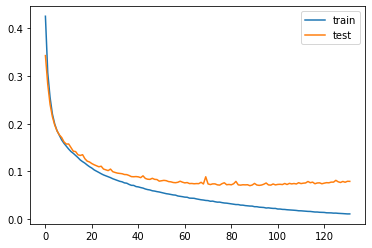

In [214]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### загрузка модели

In [202]:
from tensorflow.keras.models import load_model
LSTM = load_model('LSTM_try/LSTM.hdf5')

In [218]:
%%time
y_pred=(model.predict(x_test)>=0.15)
print(y_pred.astype(int))
print(y_test.astype(int))

[[[1]]

 [[0]]

 [[1]]

 ...

 [[0]]

 [[1]]

 [[0]]]
[[[0]]

 [[0]]

 [[1]]

 ...

 [[0]]

 [[1]]

 [[0]]]
Wall time: 1.19 s


### оценка 

In [204]:

#estimator1 = tf.keras.estimator.model_to_estimator(model)

score = LSTM.evaluate(x_test, y_test, batch_size=256)

print('Specificity :  {0:f}%\n'.format(( score[2]/(score[2]+score[1]))*100))
print('Sensitivity :  {0:f}%\n'.format( score[4]*100 ))
print('Accuracy    : {0:f}%\n'.format( score[5]*100 ))

#score = model.evaluate(x_test, y_test, batch_size=128)
#print('Specificity :  {0:f}%\n'.format(( score[3]/(score[3]+score[2]))*100))
#print('Sensitivity :  {0:f}%\n'.format(score[7]*100))
#print('Accuracy    : {0:f}%\n'.format(score[5]*100))

#predictions = model.predict(x_test, batch_size=256 )

110/110 [==============================] - 3s 7ms/step - loss: 0.0661 - fp: 215.0000 - tn: 20482.0000 - precision: 0.9705 - recall: 0.9630 - auc: 0.9937 - accuracy: 0.9826
Specificity :  98.961202%

Sensitivity :  96.300828%

Accuracy    : 99.365103%



In [207]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [206]:
conf_mat = confusion_matrix(y_test, y_pred)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100

ValueError: unknown is not supported

In [56]:
model.save("LSTM_Classification_model.h5")

In [208]:
## голосование ##

#votes = lin_model.predict(x_test) + svm_model.predict(x_test) + nb_model.predict(x_test) \
#        + forest_model.predict(x_test) + tree_model.predict(x_test) + knn_model.predict(x_test) \
#        + ((nn_model.predict(x_test)>0.5).T)[0].astype(float)

conf_mat = confusion_matrix((y_test.values == 1.0),  (votes >= 4))
#conf_mat = confusion_matrix((y_test.values == 1.0),  (votes >= 2))
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print("Statistics for voting classifier, where simple majority rules:\n")
print(conf_mat)
print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [115]:
n_batch, n_timesteps, n_input_dim = 256, 1, 187


# Create sequential model and add layers to it
model = tf.keras.Sequential()

model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True), input_shape=(n_timesteps, n_input_dim)))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Dense(1, activation='sigmoid'))



# Compile model
METRICS = [
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
callbacks = [keras.callbacks.ModelCheckpoint("lstm_at_epoch_{epoch}.h5")]


model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(1e-4), metrics=METRICS)

print('построение модели')
model.summary()

построение модели
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_34 (Bidirectio (None, 1, 512)            909312    
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 1, 128)            295424    
_________________________________________________________________
dense_46 (Dense)             (None, 1, 1)              129       
Total params: 1,204,865
Trainable params: 1,204,865
Non-trainable params: 0
_________________________________________________________________


## логистическая регрессия

In [17]:
## логистическая регрессия ## 
#lin_model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
#lin_model = LogisticRegression(solver='lbfgs')
#lin_model.fit(x_train, y_train)
#print("Linear Model Accuracy: ", lin_model.score(x_test, y_test))

# cross-validation for logistic regression
#clf_lr = LogisticRegression(solver='liblinear',class_weight='balanced',max_iter=1000)
#scores_lr = cross_val_score(clf_lr, x_train, y_train, cv=10, scoring='accuracy')
#print(scores_lr.mean())

In [ ]:
x_alldata_train_test = np.empty(shape =[x_train.shape[0]+x_test.shape[0],190]) 
print(x_alldata_train_test)
for i in range(x_train.shape[0]):
    x_alldata_train_test = np.append(x_alldata_train_test,x_train[i,:])
    #y_alldata_train_test = np.append(y_alldata_train_test,y_test)
 
print(x_alldata_train_test.shape)
print(x_alldata_train_test)

### DSP

In [ ]:
length = x_test.shape[0]*x_test.shape[1]
x_test_reshape = np.empty(shape = [0,length])
for i in  range(x_test.shape[0]):
    x_test_reshape = np.append(x_test_reshape,x_test[i,:])
    print(i)
    print(x_test_reshape[187*i:(i+1)*187])
print(x_test_reshape.shape)

In [ ]:
length = y_test.shape[0]
y_test_reshape = np.empty(shape = [0,length])
for i in  range(length):
    y_test_reshape = np.append(y_test_reshape,y_test[i])
    print(i)
    print(y_test_reshape)
print(y_test_reshape.shape)